## Challenge 1
by: Marion Pillas, Nicola Borghi and Paul Lagabbe

## Installing libraries

In [1]:
! pip install -q 'lalsuite==6.82' 'PyCBC==1.18.0'

In [ ]:
! pip install -q 'gwpy==2.0.2'

     |████████████████████████████████| 1.4MB 6.6MB/s eta 0:00:01


## Question 1

Open data file with GWpy library and compute the duration and the sample rate of the data.

In [8]:
#Question 1

#via pycbc

%matplotlib inline

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries

# Open data file
file_name = 'challenge1.gwf'
channel_name = 'H1:CHALLENGE1'
data = TimeSeries.read(file_name, channel_name)
print('The duration is', data.duration)
print('The data are sampled at', data.sample_rate)


The duration is 128.0 s
The data are sampled at 4096.0 Hz


## Question 2
Plot the time serie data

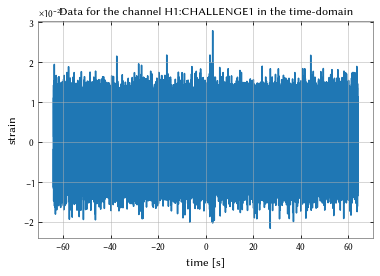

In [9]:
#Plot in the time domain
time = data.times # time variable

plt.figure()
plt.plot(time,data)
plt.xlabel('time [s]')
plt.ylabel('strain')
plt.title('Data for the channel H1:CHALLENGE1 in the time-domain')
plt.show()



## Question 3
The spectrogram and the Q transform has been computed.

We plot the spectrogram with,

> a hann window,

> a window overlap of 0.05 s,

> a window length of 0.1 s,

We plot the Q transform with,

> a frequency range from 25 to 500 Hz,

> a Q range from 100 to 110 s,

> a normalized energy range from 0 to 30.

/home/nic/miniconda3/lib/python3.8/site-packages/gwpy/plot/plot.py:395: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = super().colorbar(mappable, **kwargs)


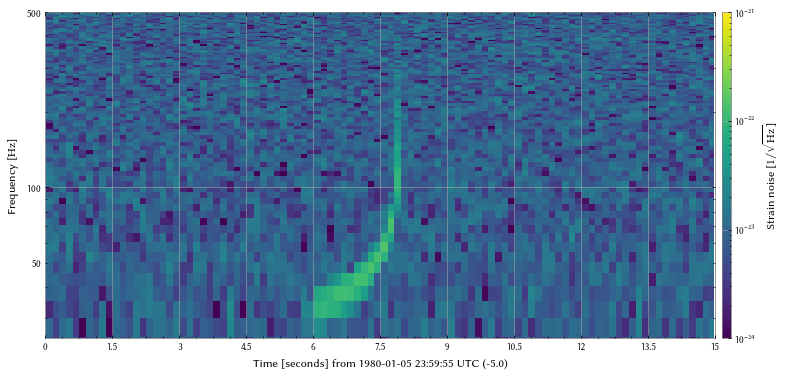

In [10]:
#Spectrogram method

specgram = data.spectrogram2(fftlength=0.2, overlap=0.05, window='hann') ** (1/2.)
plot = specgram.plot()

ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(25, 500)
ax.set_xlim(-5,10)
ax.colorbar(
    clim=(1e-24, 1e-21),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)



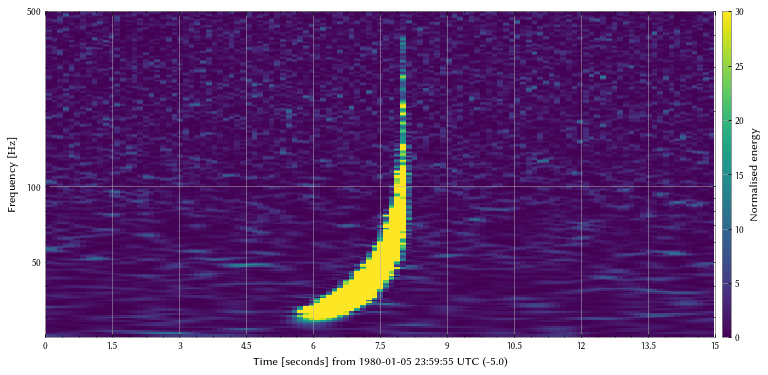

In [11]:
# Q transform method
hq = data.q_transform(frange=(25, 500), qrange=(100, 110))
plot = hq.plot()
ax = plot.gca()
ax.set_xlim(-5,10)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")
plot.colorbars[0].mappable.set_clim(0,30)

## Question 4

Compute the time of the maximum of the data array. As we can see on the time domain plot, the signal can be seen above the noise. So to maximum amplitude if the signal is higher than the noise. Therefore, the maximum can be compute by selecting the maximum absolute data value. 

In [12]:
hd = np.array(data)
print('Time of the merger: ',time[np.argmax(np.abs(hd))]) # Uncertainty = dt ?
print('The data begin at time -64 s.')

Time of the merger:  2.966552734375 s
The data begin at time -64 s.


# For fun
Display the signal as sound, 

Spoiler: The signal is supposed to be from 1'04" and 1'07", but we can hear only a small "pop". 

In [13]:
from scipy.io.wavfile import write
import IPython

scaled = np.int16(data/np.max(np.abs(data)) * 32767)

write('signal.wav', int(data.sample_rate.value), scaled)

IPython.display.Audio('signal.wav')